In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

In [2]:
x1 = 0.5
x2 = 0.5
x3 = 0.5


In [3]:
f = 100*x1**2+x2**2+(x3-20)**2
f

428

In [27]:
def f(xk):
    return 100*xk[0]**2+xk[1]**2+(xk[2]-20)**2
def df(xk):
    return np.array([200*xk[0],2*xk[1],2*(xk[2]-20)])

In [26]:
def proj(xk):
    n = np.array([1,1,1/20])
    xk_proj = xk - (np.dot(xk,n)/np.linalg.norm(n))*n
    xk_proj[xk_proj<=0]=0
    return xk_proj

In [74]:
def plot(X,Y):
    fig, ax = plt.subplots()
    ax.plot(X,Y)
    ax.annotate("End", xy=(X[-1], Y[-1]), xytext=(X[-1], Y[-1]))
    ax.annotate("Start", xy=(X[0], Y[0]), xytext=(X[0], Y[0]))
    return ax

    

Text(0, 0.5, 'x3')

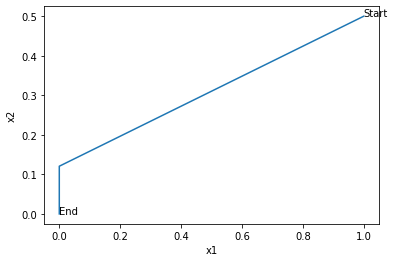

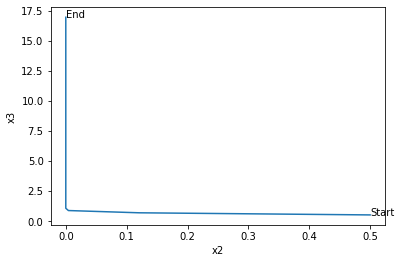

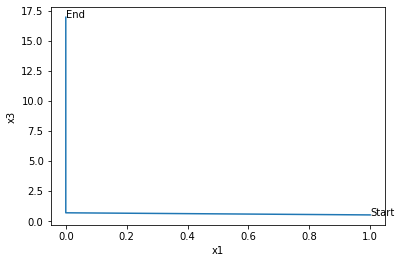

In [131]:
steps = 500
step_size = 0.005
x0 = np.array([1,0.5,0.5])
xt = x0
x1s = []
x2s = []
x3s = []

for t in range(steps):
    x1s.append(xt[0])
    x2s.append(xt[1])
    x3s.append(xt[2])
    xt = xt - step_size*df(xt)
    xt = proj(xt)

ax12 = plot(x1s,x2s)
ax12.set_xlabel('x1')
ax12.set_ylabel('x2')
ax23= plot(x2s,x3s)
ax23.set_xlabel('x2')
ax23.set_ylabel('x3')
ax13 = plot(x1s,x3s)
ax13.set_xlabel('x1')
ax13.set_ylabel('x3')


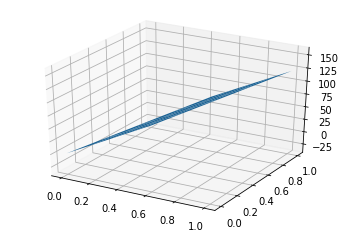

In [20]:
density = 5
x1_axis = np.linspace(0,1,density)
x2_axis = np.linspace(0,1,density)
x3_axis = np.linspace(0,1,density)
x1_grid, x2_grid= np.meshgrid(x1_axis,x2_axis)
grad = df(x1,x2)
s = np.argmin(np.matmul(grad.T,)


fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x1_grid, x2_grid, grad)

In [107]:
feasible_set = []
for x1 in np.linspace(0,1,100):
    for x2 in np.linspace(0,1,100):
        if 1-x1-x2>=0:
            feasible_set+=[[x1,x2,(1-x1-x2)*20]]
a = np.matmul(np.array([[1,2,3]]),np.array(feasible_set).T)


[1.0, 0.0, 0.0]

In [125]:
x0 = np.array([0.3,0.3,(1-0.3-0.3)*20])
xt = x0
x1s = []
x2s = []
x3s = []
for t in range(steps):
    x1s.append(xt[0])
    x2s.append(xt[1])
    x3s.append(xt[2])
    grad = np.expand_dims(df(xt),axis=0)
    s = feasible_set[np.argmin(np.matmul(grad,np.array(feasible_set).T))]
    gama = 2/(t+1)
    xt = list((1-gama)*np.array(xt) + gama*np.array(s))
    print(f(xt))

153.09
500.0
55.55555555555557
13.888888888888905
5.0
2.222222222222219
1.1337868480725628
0.6377551020408179
0.3858024691358043
0.2469135802469122
0.1652892561983469
0.11478420569329753
0.08218277449046817
0.0603791812583018
0.045351473922902244
0.03472222222222144
0.02703287197231871
0.02135930624973382
0.017099278410451856
0.013850415512466005


Text(0, 0.5, 'x3')

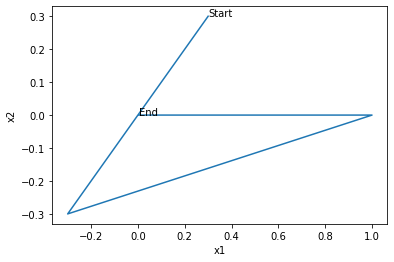

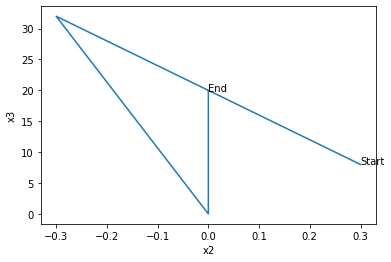

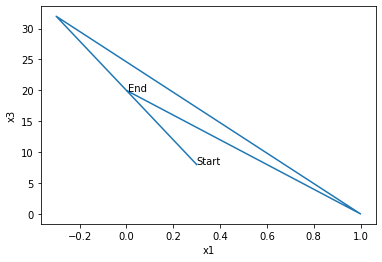

In [126]:
ax12 = plot(x1s,x2s)
ax12.set_xlabel('x1')
ax12.set_ylabel('x2')
ax23= plot(x2s,x3s)
ax23.set_xlabel('x2')
ax23.set_ylabel('x3')
ax13 = plot(x1s,x3s)
ax13.set_xlabel('x1')
ax13.set_ylabel('x3')


In [118]:
a = np.matmul(np.array([[1,2,3]]),np.array(feasible_set).T)

In [120]:
np.array(feasible_set)

array([[0.00000000e+00, 0.00000000e+00, 2.00000000e+01],
       [0.00000000e+00, 1.01010101e-02, 1.97979798e+01],
       [0.00000000e+00, 2.02020202e-02, 1.95959596e+01],
       ...,
       [9.79797980e-01, 1.01010101e-02, 2.02020202e-01],
       [9.89898990e-01, 0.00000000e+00, 2.02020202e-01],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [121]:
df(xt)

array([ -0.,  -0., -80.])

In [122]:
xt

[-0.0, -0.0, -20.0]

In [124]:
gama

0.1